## Task 1

In [21]:
import numpy as np
import matplotlib.pyplot as plt

In [22]:
n_points = 100
n_dims = 2
np.random.seed(42)
a_trans_mat = np.array([[0.25, -0.433], [1.299, 0.75]])

In [23]:
x_data_mat = np.random.rand(n_points, n_dims) @ a_trans_mat
print(x_data_mat[:5])

[[1.32861291 0.55085986]
 [0.96065586 0.13204049]
 [0.24164154 0.04943982]
 [1.13968372 0.62448191]
 [1.07006503 0.27077163]]


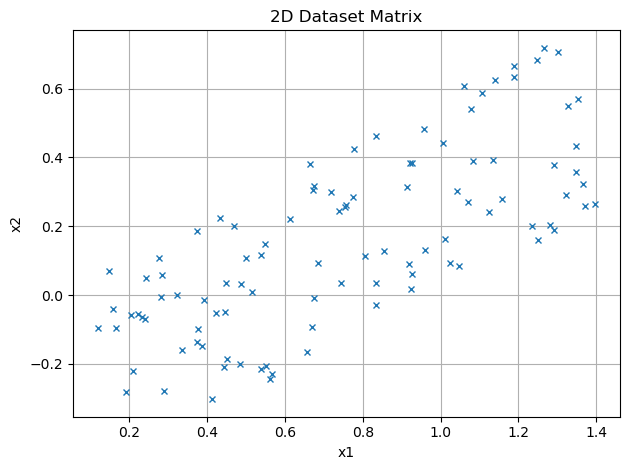

In [24]:
plt.figure()
plt.plot(
    x_data_mat[:, 0],       # x-coordinates
    x_data_mat[:, 1],       # y-coordinates
    'x',                    # x marker
    markersize=5,           
    linestyle=''            # no line between points
)
plt.title("2D Dataset Matrix")
plt.xlabel("x1")
plt.ylabel("x2")
plt.grid(True)
plt.tight_layout()         
plt.show()

### Observations

1. **The cloud is stretched into an ellipse.**
2. **There is a clear linear trend.**
3. **One principal axis dominates.**
4. **The center has shifted slightly.** 

In [25]:
c_cov_mat = np.cov(x_data_mat, bias = True, rowvar = False)
print("Covariance Matrix =\n", c_cov_mat)

Covariance Matrix =
 [[0.13973475 0.06978907]
 [0.06978907 0.06480288]]


In [26]:
## Initializing direction vector V0
v_vec = np.random.randn(n_dims) # draws two independent samples from the normal distribution
v_vec /= np.linalg.norm(v_vec) # computes the eucledian norm of v0 and divides it by it's own norm turning it into a unit vector
print("v0 =", v_vec)

v0 = [-0.94632852  0.32320633]


In [27]:
tol = 1e-6
for i in range(1, 11):
    w = c_cov_mat @ v_vec       # applying covariance
    lambda_ = np.linalg.norm(w) # estimating eigenvalue
    v_next = w / lambda_ # normalizing to get next v
    delta = np.linalg.norm(v_next - v_vec) # convergence criteria
    print(f"Iter {i:2d}: lambda = {lambda_:.6f}, Delta = {delta:.2e}, v = [{v_next[0]:.4f}, {v_next[1]:.4f}]")

    if delta < tol:
        print(f"Converged after {i} iterations (Δ={delta:.2e} < {tol})")
        break
        
    v_vec = v_next # next iteration

# Final result
print("\nLeading eigenvalue:", lambda_)
print("Leading eigenvector:", v_next)

Iter  1: lambda = 0.118589, Delta = 7.04e-01, v = [-0.9249, -0.3803]
Iter  2: lambda = 0.179502, Delta = 1.30e-01, v = [-0.8678, -0.4969]
Iter  3: lambda = 0.181446, Delta = 1.66e-02, v = [-0.8594, -0.5112]
Iter  4: lambda = 0.181478, Delta = 2.11e-03, v = [-0.8584, -0.5131]
Iter  5: lambda = 0.181479, Delta = 2.69e-04, v = [-0.8582, -0.5133]
Iter  6: lambda = 0.181479, Delta = 3.41e-05, v = [-0.8582, -0.5133]
Iter  7: lambda = 0.181479, Delta = 4.34e-06, v = [-0.8582, -0.5133]
Iter  8: lambda = 0.181479, Delta = 5.51e-07, v = [-0.8582, -0.5133]
Converged after 8 iterations (Δ=5.51e-07 < 1e-06)

Leading eigenvalue: 0.18147873565405748
Leading eigenvector: [-0.85819452 -0.51332462]


##### No matter how you initialize v0, the power method consistently homes in on the same principal eigenpair in just a handful of steps.

In [28]:
# init
v_vec = np.random.randn(2)
v_vec /= np.linalg.norm(v_vec)

# Quantifying the direction changes using np.dot
tol = 1e-6    # stop once angle < tol (in radians)
max_iter = 50

for i in range(1, max_iter+1):
    w      = c_cov_mat @ v_vec
    lambda_ = np.linalg.norm(w)
    v_next = w / lambda_

    # computing the angle between old and new direction
    cos_phi = np.dot(v_vec, v_next)          # since ‖v‖=‖v_next‖=1
    phi     = np.arccos(np.clip(cos_phi, -1, 1))

    print(f"Iter {i:2d}: λ={lambda_:.6f}, angle={phi:.2e} rad")

    # checking convergence
    if phi < tol:
        print(f"Converged after {i} iterations (angle {phi:.2e} < {tol})")
        break

    # updating for next iteration
    v_vec = v_next

Iter  1: λ=0.035394, angle=7.21e-01 rad
Iter  2: λ=0.139598, angle=5.93e-01 rad
Iter  3: λ=0.180465, angle=9.30e-02 rad
Iter  4: λ=0.181462, angle=1.19e-02 rad
Iter  5: λ=0.181478, angle=1.51e-03 rad
Iter  6: λ=0.181479, angle=1.92e-04 rad
Iter  7: λ=0.181479, angle=2.43e-05 rad
Iter  8: λ=0.181479, angle=3.09e-06 rad
Iter  9: λ=0.181479, angle=3.93e-07 rad
Converged after 9 iterations (angle 3.93e-07 < 1e-06)


### Task 1 c

Let $C$ be a $(2\times2)$ covariance matrix of the mean centered data, with entries

$$
C = \begin{pmatrix}
C_{11} & C_{12} \\
C_{21} & C_{22}
\end{pmatrix},
$$

where

$$
C_{11} = \frac{1}{n}\sum_{i=1}^n (x_{i1} - m_1)^2,
\qquad
C_{22} = \frac{1}{n}\sum_{i=1}^n (x_{i2} - m_2)^2.
$$

1. **Sum of eigenvalues = sum of diagonal entries**  
   A key fact is that for any square matrix, the sum of its eigenvalues equals the sum of its diagonal entries.  Here:

   $$
   \lambda_1 + \lambda_2 \;=\; C_{11} + C_{22}.
   $$

2. **Meaning of $(C_{11} + C_{22})$**  
   By definition,

   $$
   C_{11} + C_{22}
   = \frac{1}{n}\sum_{i=1}^n\Bigl[(x_{i1}-m_1)^2 + (x_{i2}-m_2)^2\Bigr]
   = \frac{1}{n}\sum_{i=1}^n \|x_i - m\|^2.
   $$

   That is, $(C_{11}+C_{22})$ is the **average squared distance** of the points from the mean.

3. **Interpretation**  
   - $(\lambda_1 + \lambda_2)$ (the sum of eigenvalues) equals the total variance in the two original coordinate directions.  
   - Each $(\lambda_i)$ is the variance along its principal direction (eigenvector), and their sum recovers the total variance we started with.  


### Task 1D

In [29]:
def power_method(x_data_mat, n_evs, tol=1e-6, max_iter=100):
    """
    Computing several eigenvectors without np.linalg.eig

    Parameters:
    x_data_mat : The data matrix (rows = samples), assumed already mean‐centered or we will center it inside the function.
    n_evs : Number of leading eigen values/vecs to calculate.
    tol : Convergence tolerance on ||v_new - v_old||.
    max_iter : Maximum number of inner iterations.

    Returns:
    eigvals : The leading eigenvalues in descending order.
    eigvecs : Corresponding eigenvectors.
    """
    # centering the data
    X = x_data_mat - x_data_mat.mean(axis=0, keepdims=True)
    # initial covariance
    C = np.cov(X, bias=True, rowvar=False)

    eigvals_arr = [] # shape is (n_evs, )
    eigvecs_arr = [] # shape is (n_evs, n_dims)

    for k in range(n_evs):
        # random initial unit vector
        v = np.random.randn(C.shape[0])
        v /= np.linalg.norm(v)

        # power method on current C
        for i in range(max_iter):
            w     = C @ v
            lambda_   = np.linalg.norm(w)
            v_new = w / lambda_

            # checking convergence
            if np.linalg.norm(v_new - v) < tol:
                break
            v = v_new

        # storing the converged eigenpair
        eigvals_arr.append(lambda_)
        eigvecs_arr.append(v_new.copy())

        # removing the found component
        C = C - lambda_ * np.outer(v_new, v_new)

    return np.array(eigvals_arr), np.vstack(eigvecs_arr)

# Example usage:
n_evs = 2
lams, vecs = power_method(x_data_mat, n_evs)
print("Leading eigenvalues:", lams)
print("Leading eigenvectors:\n", vecs)

Leading eigenvalues: [0.18147874 0.0230589 ]
Leading eigenvectors:
 [[ 0.85819449  0.51332467]
 [-0.51332455  0.85819456]]


# Task 2

In [30]:
# loading the data
hidden1 = np.genfromtxt('hidden1.csv', delimiter=',')
hidden2 = np.genfromtxt('hidden2.csv', delimiter=',')

print("hidden1 shape:", hidden1.shape)  # should be (n_samples1, 10)
print("hidden2 shape:", hidden2.shape)  # should be (n_samples2, 10)

hidden1 shape: (2232, 10)
hidden2 shape: (2628, 10)


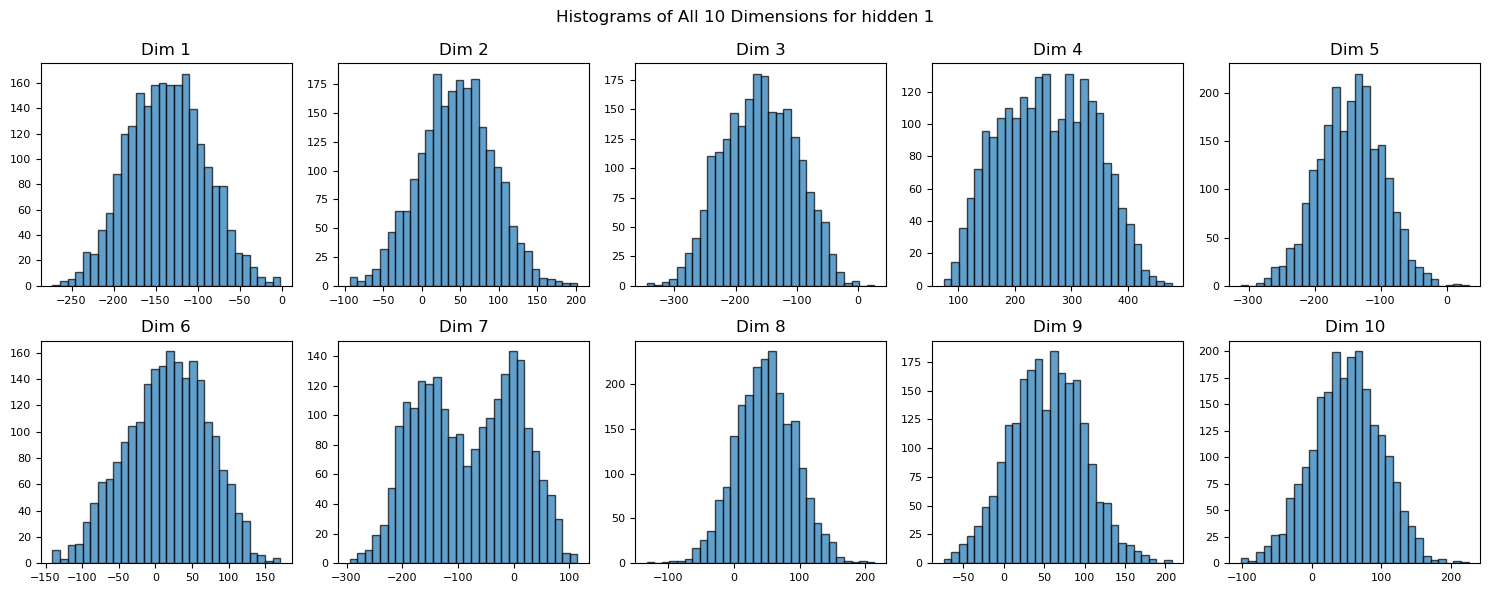

In [31]:
# Task 2a
# All 10 dimensions in a 2×5 grid for hidden1
fig, axes = plt.subplots(2, 5, figsize=(15, 6), tight_layout=True)

for dim in range(10):
    ax = axes.flat[dim]
    ax.hist(hidden1[:, dim], bins=30, edgecolor='black', alpha=0.7)
    ax.set_title(f'Dim {dim+1}')
    ax.tick_params(axis='both', which='major', labelsize=8)

fig.suptitle('Histograms of All 10 Dimensions for hidden 1')
plt.show()

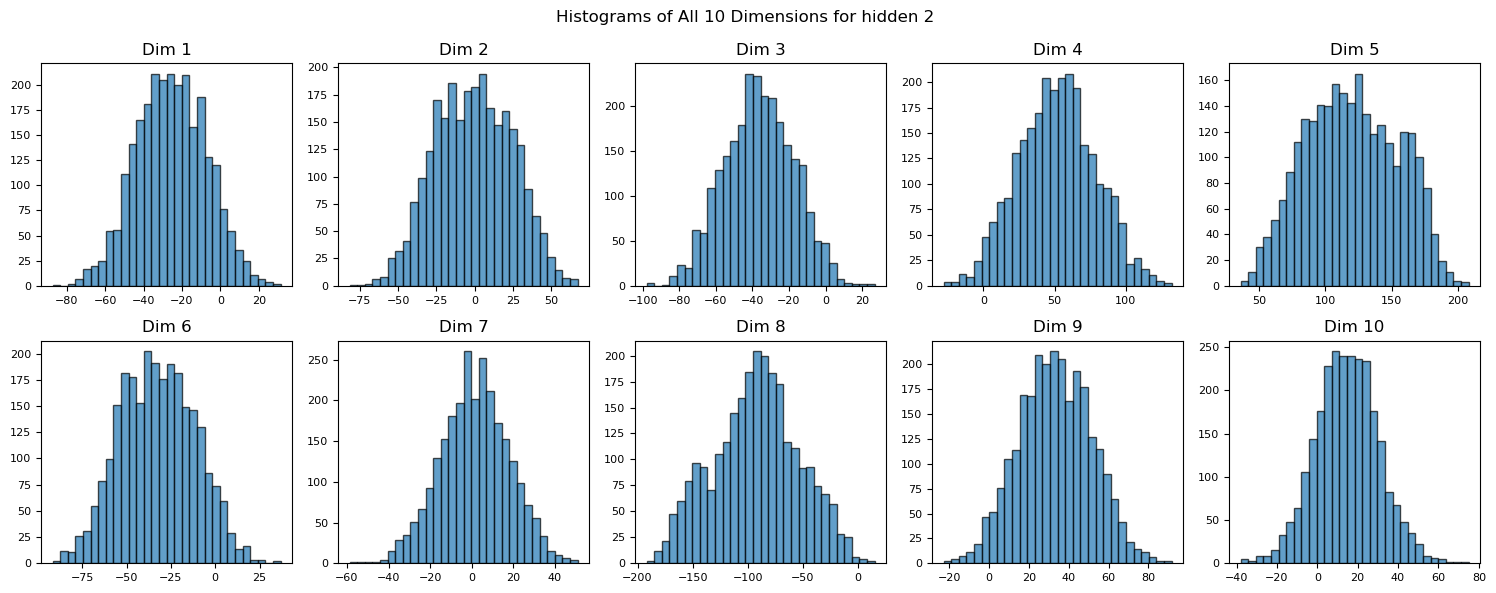

In [32]:
# All 10 dimensions in a 2×5 grid for hidden2
fig, axes = plt.subplots(2, 5, figsize=(15, 6), tight_layout=True)

for dim in range(10):
    ax = axes.flat[dim]
    ax.hist(hidden2[:, dim], bins=30, edgecolor='black', alpha=0.7)
    ax.set_title(f'Dim {dim+1}')
    ax.tick_params(axis='both', which='major', labelsize=8)

fig.suptitle('Histograms of All 10 Dimensions for hidden 2')
plt.show()

## Task 2a – Observations on the Histograms

1. **Generally bell-shaped**  
   Most of the ten dimensions in both hidden1 and hidden2 show roughly symmetric, resembles a normal gaussian distribution.

2. **Centering and spread vary by dimension**  
   - In hidden1, several dimensions (e.g. Dim 1, Dim 3, Dim 5) are centered well below zero, while others (Dim 4, Dim 8, Dim 10) peak above zero.  
   - In hidden2, most dimensions cluster around a small positive mean.  
   - The width (variance) also differs some dims are tightly concentrated, others more spread out.

3. **Occasional bimodality or skew**  
   A couple of dimensions (e.g. Dim 7 in hidden1) show two peaks, suggesting a mixture of two subpopulations.  And a few histograms exhibit slight skew rather than perfect symmetry. 


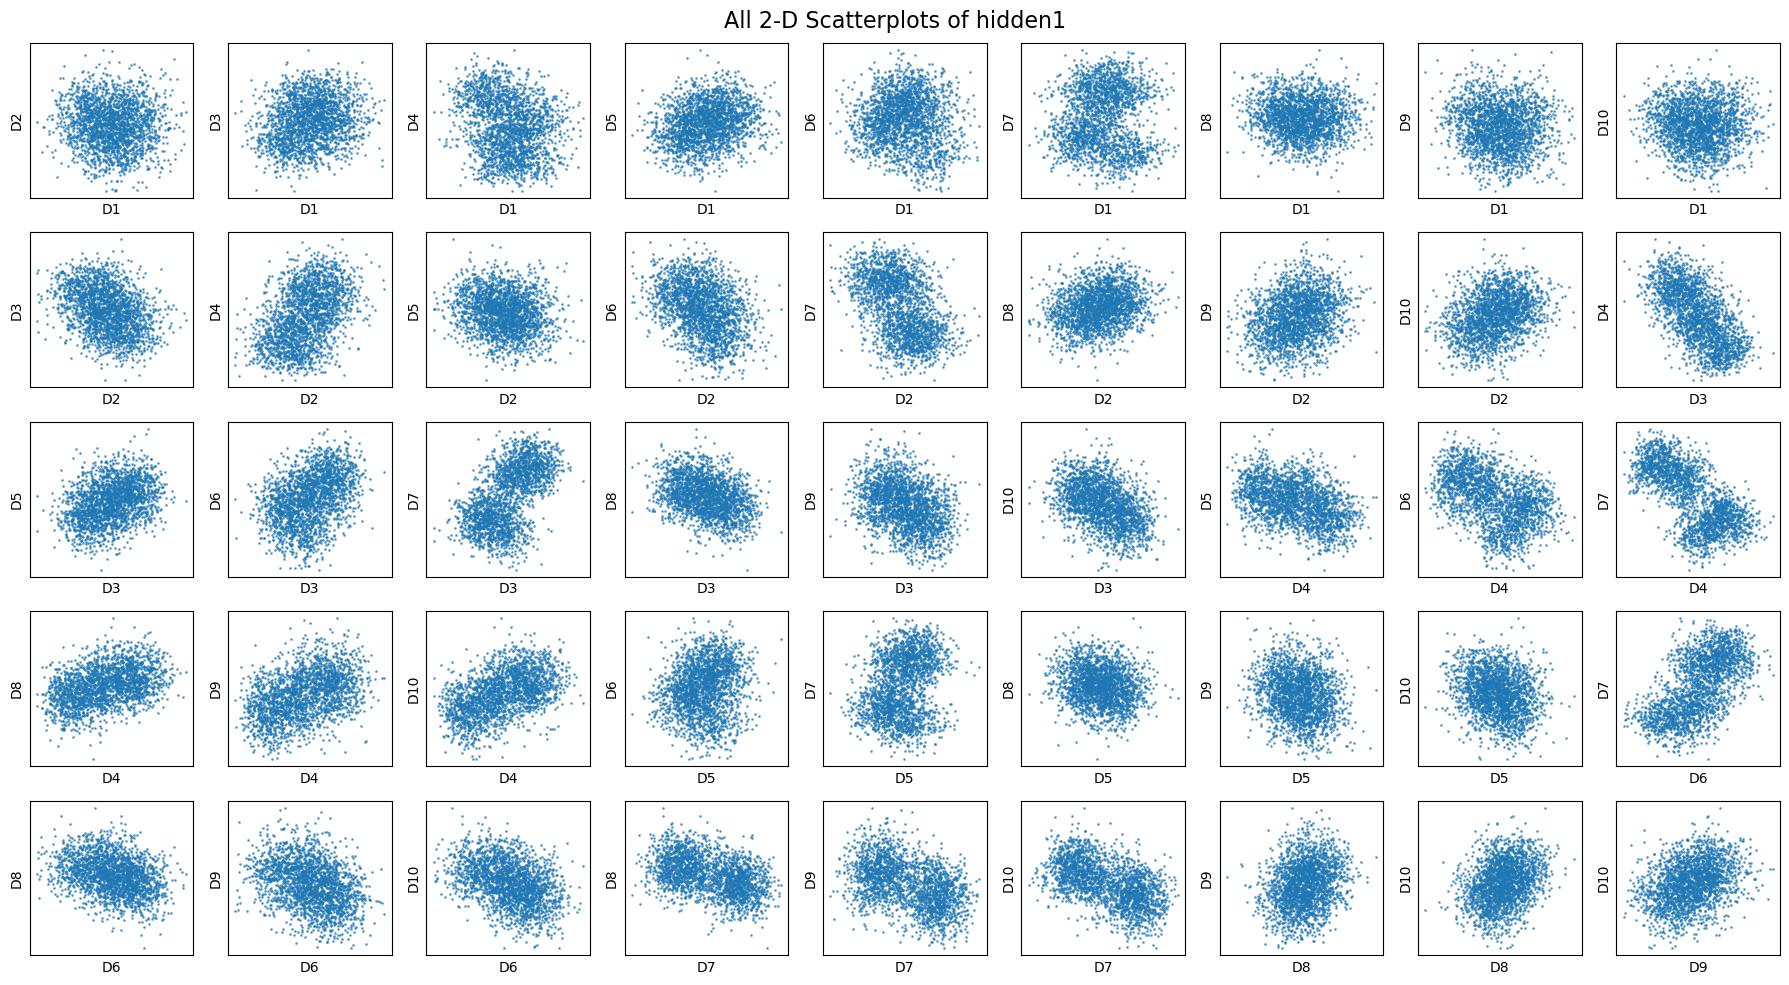

In [41]:
# subplot grid for C(10, 2) = 45 plots (for 10 dims)
n_rows, n_cols = 5, 9  # 5×9 = 45
plt.figure(figsize=(18, 10))

# Counter for subplot index
plot_idx = 1

# Loop over all pairs i < j
for i in range(10):
    for j in range(i + 1, 10):
        ax = plt.subplot(n_rows, n_cols, plot_idx)
        ax.plot(hidden1[:, i], hidden1[:, j], '.', markersize=2, alpha=0.6)
        ax.set_xlabel(f"D{i+1}")
        ax.set_ylabel(f"D{j+1}")
        ax.set_xticks([])
        ax.set_yticks([])
        plot_idx += 1

plt.suptitle("All 2-D Scatterplots of hidden1", fontsize=16)
plt.tight_layout()
plt.show()

#### As you can see, some of the dimensions are correlated like D3 and D4

In [44]:
eigvals_arr, eigvecs_arr = power_method(hidden1, n_evs = 10, tol=1e-6, max_iter=15)

print(eigvals_arr , eigvecs_arr)

[17954.89687251  3518.59993556  1720.05016827  1700.32659797
  1579.17095563  1601.63205151  1478.77487897  1493.74704328
  1562.93892618  1531.32294118] [[-0.05177163  0.19395275 -0.32772593  0.53298808 -0.15072038 -0.27384106
  -0.59653445  0.16978154  0.18125909  0.23017801]
 [ 0.50226334  0.06365357  0.25721735 -0.42093717  0.4029819  -0.40736878
  -0.40424813  0.03238196  0.03818074  0.07787327]
 [-0.00477818 -0.55784116 -0.48147218 -0.46444452 -0.26144979 -0.08064403
  -0.01839948  0.33014005  0.11759428  0.20796004]
 [-0.13296889 -0.08511199 -0.2835775   0.11862897  0.80398486  0.39653606
  -0.04981476  0.26085158 -0.03846467  0.07034985]
 [-0.50838009 -0.31475864  0.50638484 -0.1199342  -0.02217972  0.22649927
  -0.45549036 -0.07254537  0.3266897   0.02031095]
 [ 0.12554933 -0.34061169  0.15412483  0.33627901  0.19573357 -0.27397621
   0.42552572 -0.13974152  0.55901134  0.3239057 ]
 [ 0.61967503 -0.22279444  0.03776693  0.2132365  -0.17571506  0.49017936
  -0.17118708  0.11827

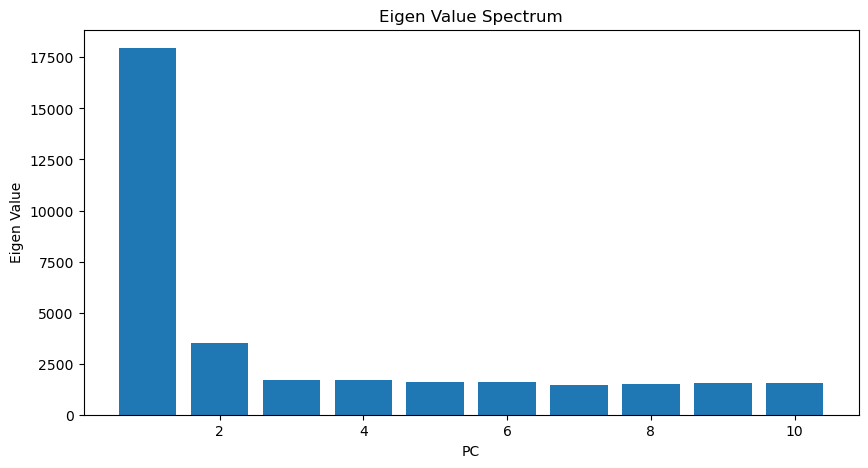

In [48]:
plt.figure (figsize = (10, 5))
plt.bar (range(1, len(eigvals_arr)+1), eigvals_arr)
plt.xlabel("PC")
plt.ylabel("Eigen Value")
plt.title("Eigen Value Spectrum")
plt.show()

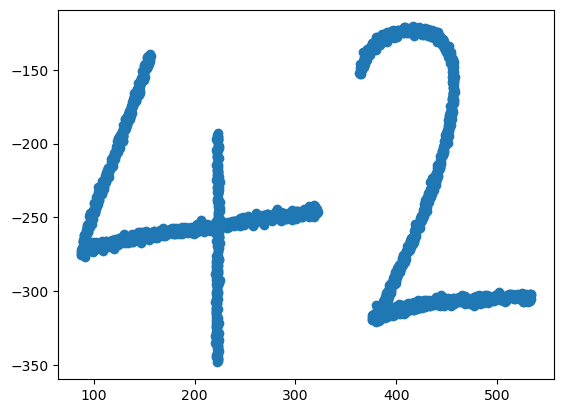

In [54]:
z1_1 = eigvecs_arr[0] @ hidden1.T
z1_2 = eigvecs_arr[1] @ hidden1.T

plt.plot(z1_1, z1_2, linestyle ='none', marker='o')

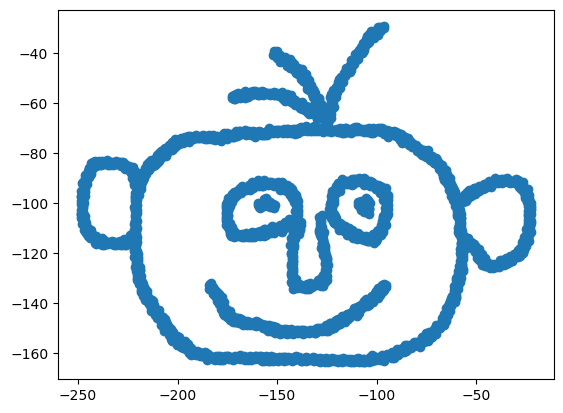

In [58]:
eigvals_arr, eigvecs_arr = power_method(hidden2, n_evs = 10, tol=1e-10, max_iter=15)
z2_1 = eigvecs_arr[0] @ hidden2.T
z2_2 = eigvecs_arr[1] @ hidden2.T

plt.plot(z2_1, z2_2, linestyle ='none', marker='o')